### **Submission rules**:
1. The completed assignment should be prepared as a Google Colab notebook. Please make a copy of this notebook for your team. Submit the link to the notebook to cms and open it via UCU email address.
2. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and make sure that the names of all team members are listed in the notebook. Teammates not mentioned in the notebook will not be graded for this lab.
3. You also need to provide a work breakdown structure estimating the efforts of each team member. Please provide it at the top of your notebook.
4. The final deadline is May 9 2023, 23:59. 

**IMPORTANT:** Making any changes to your code after this time and date is forbidden and will be a reason for point deduction for the whole team.

Team:
* Yaryna Fialko
* Natalia Chaika
* Anastasiia Shvets

# Image compression with SVD

The singular value decomposition of a matrix A is the factorization of A into the
product of three matrices:
\begin{align}
 A = UDV^T, 
 \end{align}
where the columns of U and V are orthonormal and
the matrix D is diagonal with positive real entries. The SVD is useful in many tasks. First, in many applications, the data matrix A is close to a
matrix of low rank and it is useful to find a low rank matrix which is a good approximation
to the data matrix. You will show that from the singular value decomposition of A, we can get the matrix B of rank k which best approximates A; in fact, we can do this for every
k. Also, singular value decomposition is defined for all matrices (rectangular or square) unlike spectral decomposition, although the latter one is used more commonly in Linear Algebra.

Considering that any image can be represented as a rectangular matrix, you can find the best rank k approximation of this image using SVD. The idea is that by significantly reducing the storage space, you can still preserve a very good quality of the image

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget

In [ ]:
# Fetch the necessary data

%env DATA_PERMALINK=https://raw.githubusercontent.com/andylvua/la_lab3_data/main/images/happy-dog.jpg
!wget -nc $DATA_PERMALINK -P ./data # type: ignore

env: DATA_PERMALINK=https://raw.githubusercontent.com/andylvua/la_lab3_data/main/images/happy-dog.jpg
--2023-05-15 22:23:07--  https://raw.githubusercontent.com/andylvua/la_lab3_data/main/images/happy-dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259400 (253K) [image/jpeg]
Saving to: ‘./data/happy-dog.jpg’

happy-dog.jpg       100%[===================>] 253.32K  --.-KB/s    in 0.005s  

2023-05-15 22:23:07 (45.7 MB/s) - ‘./data/happy-dog.jpg’ saved [259400/259400]



### SVD of symmetric matrices (0.5 pts)

Here you have a symmetric matrix A. Compute a full SVD of this matrix (you may use built-in SVD functions).

In [ ]:
A = np.array([[1, 2, 3, 4], [2, 7, 4, 5], [3, 4, 3, 8], [4, 5, 8, 3]])
# Your code here
U, s, V = np.linalg.svd(A)

print("U:\n", U)
print("s:\n", s)
print("V:\n", V)

U:
 [[-0.30461046 -0.14903379 -0.31295055 -0.88716591]
 [-0.54242371 -0.07127124  0.83165076 -0.09515223]
 [-0.53433563 -0.64331012 -0.35591771  0.41708524]
 [-0.57225381  0.74757035 -0.28938132  0.17298151]]
s:
 [17.33847234  5.15839249  2.79573697  0.97581683]
V:
 [[-0.30461046 -0.54242371 -0.53433563 -0.57225381]
 [ 0.14903379  0.07127124  0.64331012 -0.74757035]
 [-0.31295055  0.83165076 -0.35591771 -0.28938132]
 [ 0.88716591  0.09515223 -0.41708524 -0.17298151]]


Explain what matrices did you get as a result. What can you say about singular values of this matrix (about its eigenvalues)? Derive singular values without using built-in functions.

U: Unitary matrix having left singular vectors as columns\
s: Array of singular values in descending order\
V: Unitary matrix having right singular vectors as columns

For a symmetric matrix like A, the singular values coincide with the absolute values of the eigenvalues.

In [ ]:
# Compute A^T * A
ATA = np.dot(A.T, A)

# Compute eigenvalues of ATA
eigenvalues, _ = np.linalg.eig(ATA)

# Compute singular values as square root of eigenvalues
singular_values = np.sqrt(np.real(eigenvalues))

# Sort singular values in descending order
singular_values = np.sort(singular_values)[::-1]

print("Singular values of A:\n", singular_values)

Singular values of A:
 [17.33847234  5.15839249  2.79573697  0.97581683]


How $SVD$ relates to matrises $Q, D, Q^T$ in spectral decomposition of this matrix? Are they identical? If they are, can you say that SVD of symmetric matrices always corresponds to its spectral decomposition? If not, then is it possible to find such symmetric matrises that SVD and spectral decomposition are identical?

### Image compression using SVD (1.5 pts)

Upload the picture of a dog. 

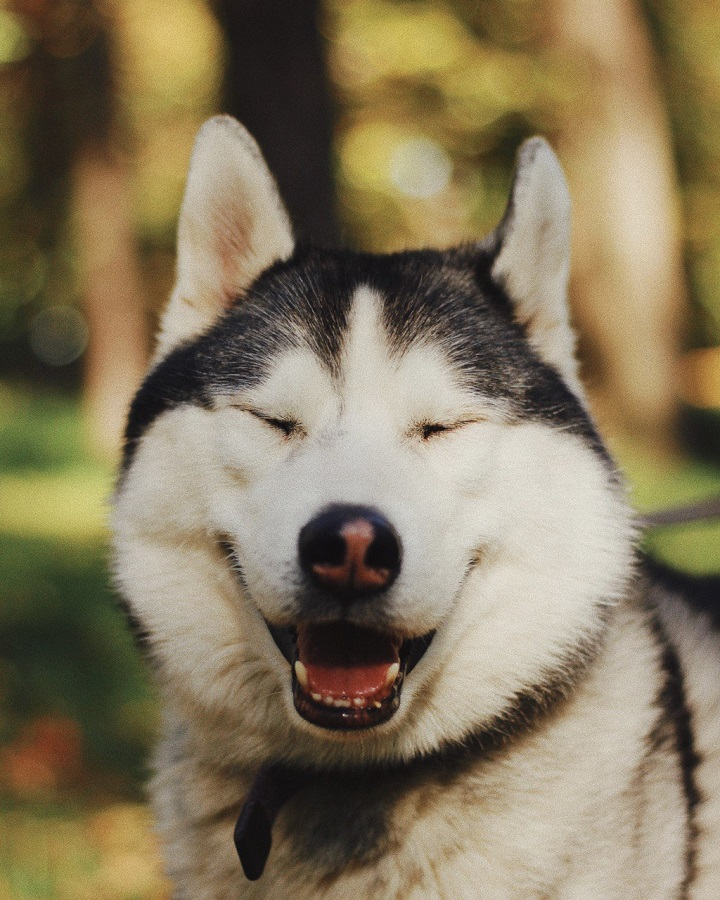

In [ ]:
path = "data/happy-dog.jpg"
image = cv.imread(path)
image = image.astype('float32')
cv2_imshow(image)

Complete the below function for finding a reduced SVD of a given matrix. (You may use the functions for finding eigenvalues of the matrix). Highlight the key differences between SVD and the reduced version of it.

In [ ]:
def reduced_svd(A):
    '''
    Input: any matrix A
    Returns: tuple of matrix U, array of singular values, and matrix V.T 
    '''
    # Compute eigenvalues and eigenvectors of A^T * A
    eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

    # Sort eigenvalues and eigenvectors in descending order
    indices = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]

    # Compute singular values as square root of eigenvalues
    singular_values = np.sqrt(eigenvalues)

    # Normalize the singular vectors
    U = A @ eigenvectors
    U = U / singular_values

    # Compute V as the normalized eigenvectors of A^T * A
    V = eigenvectors

    return U, singular_values, V.T

The reduced $SVD$ basically chops off all the unimportant data: if a matrix $A$ is of rank $r$, it has only $r$ positive singular values. Other are zeros.
Thus, the reduced $SVD$ gets rid of those zero values $\sigma_i$ and corresponding left and right singular vectors that results in $m \times r$ matrix $U$, 
$r \times r$ matrix $\Sigma$ and $r \times n$ matrix $V^T$.

Inspite of that, the reduced $SVD$ still returns us the matrix $A$!

Complete the function below. It should output the k-rank approximation of the given image using previously written SVD function. Use the slider to see how the image quality changes as we increase/decrease k.

For simplification, you can convert your image to a grayscale. However, it will be appreciated if you work with RGB channels (it is possible that you'll need to modify the method below a little).

In [ ]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def reduced_svd_Ak(A, k):
    # Compute SVD
    U, s, Vt = np.linalg.svd(A, full_matrices=False)

    # Reduce to k-rank
    Uk = U[:, :k]
    sk = s[:k]
    Vtk = Vt[:k, :]

    # Compute approximation
    Ak = np.dot(Uk, np.dot(np.diag(sk), Vtk))

    return Ak

@interact(k=widget.IntSlider(min=1, max=np.linalg.matrix_rank(gray), value=100), image=fixed(gray))
def k_rank_compressed_image(k, image):
    # Compute k-rank approximation
    approximated = reduced_svd_Ak(image, k)

    # Display compressed image
    cv2_imshow(approximated)

interactive(children=(IntSlider(value=100, description='k', max=720, min=1), Output()), _dom_classes=('widget-…

In general, compressing the image to 60-80% percent of its original size  lowers its quality but human eye won't be even able to notice it. Therefore, we can win in storage while keeping almost the same image quality. Find out the range of $k$'s which result in keeping only 60-80% of the size of the original image. For what $k$'s there is no reason to use SVD for the sake of reducing storage space?

In [ ]:
def compressed_size(k, image):
    U, S, VT = reduced_svd(image)
    return U[:, :k].size + S[:k].size + VT[:k].size

In [ ]:

# Define grayscale_image
gs_image = cv.imread("data/happy-dog.jpg", cv.IMREAD_GRAYSCALE)
gs_image = gs_image.astype('float32')

# Define max_k as the rank of the grayscale_image matrix
max_k = np.linalg.matrix_rank(gs_image)

# Define the compression limit as the square root of the size of the grayscale_image matrix
compression_limit = int(np.sqrt(gs_image.size))

# Define a function to perform binary search for the lower and upper bounds of k
def binary_search(lower_bound, upper_bound, size_limit, image):
    while lower_bound <= upper_bound:
        mid = (lower_bound + upper_bound) // 2
        size = compressed_size(mid, image)
        if size < size_limit:
            lower_bound = mid + 1
        elif size > size_limit:
            upper_bound = mid - 1
        else:
            return mid, mid
    return lower_bound, upper_bound

# Define the lower bound of k as the smallest value for which the compressed
# size is less than 60% of the original size
lower_bound_k, _ = binary_search(1, max_k, 0.6 * gs_image.size, gs_image)

# Define the upper bound of k as the largest value for which the compressed size 
# is less than 80% of the original size
upper_bound_k = int(np.around(0.8/0.6 * lower_bound_k))

# Define the compression limit as the largest value of k for which the compressed
# size is less than the square root of the size of the grayscale_image matrix
compression_limit = np.around(1/0.8 * upper_bound_k).astype(np.int32)

print("Range of k for 60-80% compression:", lower_bound_k, "-", upper_bound_k)
print("It makes no sense for compression with SVD for k more than:", compression_limit)

Range of k for 60-80% compression: 240 - 320
It makes no sense for compression with SVD for k more than: 400


### Results (1 pt) 
Choose some metric for determining how good the compression with SVD is. Experiment with other compression algorithms (DCT, for instance). Compare it with SVD. Be creative;)

DCT stands for Discrete Cosine Transform. It converts a signal or image from the spatial domain to the frequency domain. DCT is closely related to the Fourier Transform and is particularly well-suited for analyzing and compressing signals or images that have a finite duration or extent.
In the context of image compression, the DCT is commonly used as part of transformation-based compression algorithms like JPEG. The image is divided into blocks, typically 8x8 pixels, and the DCT is applied to each block independently.

We will use PSNR quality metric. PSNR stands for Peak Signal-to-Noise Ratio.  It measures the ratio of the peak signal power to the power of the difference (or error) between the original and reconstructed/compressed signals.

In [ ]:
def compress_image_dct(img, reduction_factor):
    # Apply DCT to image
    img_dct = cv.dct(img.astype('float'))

    # Calculate the number of coefficients to keep
    rows, cols = img.shape
    coeffs_r = int(rows * reduction_factor)
    coeffs_c = int(cols * reduction_factor)

    # Set the high frequency coefficients to zero
    img_dct[coeffs_c:, coeffs_r:] = 0

    # Apply inverse DCT to image
    img_compressed = cv.idct(img_dct).astype('float32')

    return img_compressed

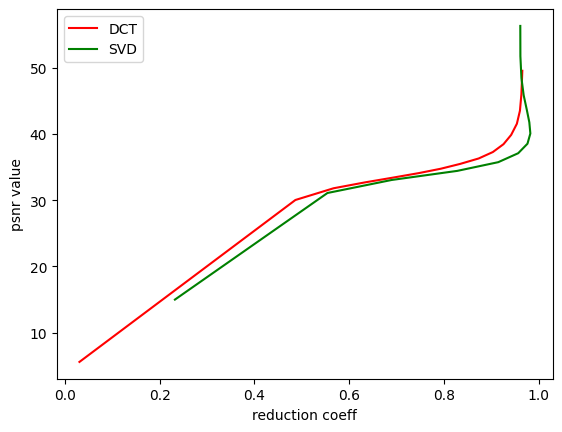

In [ ]:
import os
import matplotlib.pyplot as plt
# Load the original image
original_image = cv.imread('./data/happy-dog.jpg', cv.IMREAD_GRAYSCALE)
original_image = original_image.astype('float32')
original_size = os.path.getsize('./data/happy-dog.jpg')

reduction_coeff_dct = []
psnr_dct_lst = []
for reduction_factor in np.arange(0, 0.8, 0.05):
    compressed_image = compress_image_dct(original_image, reduction_factor)
    # Calculate PSNR
    psnr_dct = cv.PSNR(compressed_image, original_image)
    psnr_dct_lst.append(psnr_dct)
    # get the reduction value
    cv.imwrite('./data/compressed_dog.jpg', compressed_image)
    compressed_size = os.path.getsize('./data/compressed_dog.jpg')
    reduction_coeff_dct.append(compressed_size/original_size)
    
    
reduction_coeff_svd = []
psnr_svd_lst = []
# rank of original_image is 720
for k in range(1, 700, 50):
    compressed_image = reduced_svd_Ak(original_image, k)
    # Calculate PSNR
    psnr_svd = cv.PSNR(compressed_image, original_image)
    psnr_svd_lst.append(psnr_svd)
    # get the reduction value
    cv.imwrite('./data/compressed_dog.jpg', compressed_image)
    compressed_size = os.path.getsize('./data/compressed_dog.jpg')
    reduction_coeff_svd.append(compressed_size/original_size)


plt.plot(reduction_coeff_dct, psnr_dct_lst, color="red", label="DCT")
plt.plot(reduction_coeff_svd, psnr_svd_lst, color="green", label="SVD")
plt.xlabel("reduction coeff")
plt.ylabel("psnr value")
plt.legend()
plt.show()


DCT coefficients can be quantized and truncated to achieve lossy compression, where some information is discarded to reduce file size while maintaining acceptable visual quality.

SVD can be used for image compression by retaining only the most significant singular values and corresponding singular vectors, effectively reducing the rank of the image matrix.

In summary, DCT and SVD are different mathematical transformations with distinct applications. DCT is primarily used for compression, focusing on frequency content and energy distribution, while SVD is more versatile, used for various tasks like dimensionality reduction and data analysis, capturing the overall structure of the data.